# PIRT/SPRING Camera WSP Development

In [5]:
from imagedaemon import registry
available_cameras = registry.available()
print("Registered cameras:", available_cameras)



Registered cameras: ['pirt', 'qcmos', 'summer-ccd', 'winter']


In [6]:
# PIRT Pipeline
import os
imagedaemon = registry.get("pirt")

## SPRING + WSP Focus Loop

These are the filenames as printed out by WSP after running a focus loop:
```bash:
FOCUS LOOP DATA:
     [1] Focuser Pos: 19400.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102231-263.fits
     [2] Focuser Pos: 19560.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102259-420.fits
     [3] Focuser Pos: 19720.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102329-392.fits
     [4] Focuser Pos: 19880.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102359-217.fits
     [5] Focuser Pos: 20040.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102429-091.fits
     [6] Focuser Pos: 20200.0, ~\data\images\20251022\spring/SPRINGCamera_20251023-102459-480.fits
```

In [11]:



images = ['~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102231-263.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102259-420.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102329-392.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102359-217.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102429-091.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102459-480.fits']




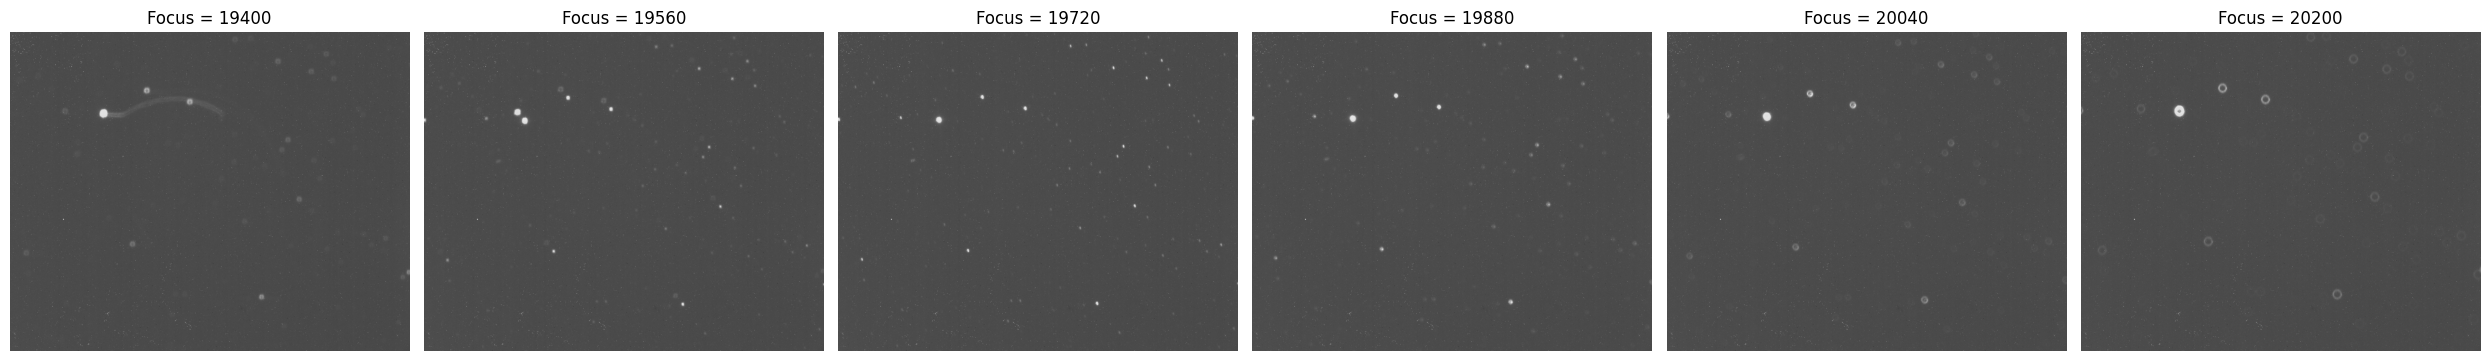

In [12]:
# Run the focus loop by directly running the pipeline:
# Focus attempt
from imagedaemon.utils.image import Image
import matplotlib.pyplot as plt
from glob import glob
focus_images = images
# make a plot with all images in a single figure


fig, axs = plt.subplots(nrows=1, ncols=len(focus_images), figsize=(25, 5))

for ax, img_path in zip(axs, focus_images):
    img = Image(img_path)
    ax.imshow(img.data, cmap='gray', origin='lower')
    ax.set_title(f"Focus = {img.header.get('FOCPOS'):.0f}")
    ax.axis('off')
plt.tight_layout()


In [14]:
images = ['~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102231-263.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102259-420.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102329-392.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102359-217.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102429-091.fits',
 '~\\data\\images\\20251022\\spring/SPRINGCamera_20251023-102459-480.fits']

# now try for a focus loop

results = imagedaemon.run_focus_loop(image_list = images,
                                   addrs = None,
                                   output_dir = os.path.join(os.path.expanduser("~"), "data", "tmp"),
)

print(f"Focus loop results: {results}")

AttributeError: 'PosixPath' object has no attribute 'data'

In [ ]:
'''
from imagedaemon import registry
import os
from glob import glob
available_cameras = registry.available()
print("Registered cameras:", available_cameras)

# check the camera parameters
for camname in available_cameras:
    camera = registry.get(camname)
    print("camera:")
    for entry in camera.meta:
        print(f"\t {entry}")

pirt = registry.get("pirt")
science_dir = os.path.join(os.path.expanduser("~"), "data", "image-deamon-data",
                           "raw", "pirt","commissioning", "20250803", "science","WNTR25fejjz")

'''

Registered cameras: ['pirt', 'qcmos', 'summer-ccd', 'winter']
camera:
	 ('name', 'pirt')
	 ('pixel_scale', 0.411)
	 ('cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('focus_cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('sex_cfg_dir', PosixPath('/Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/config'))
	 ('scale_margin', 0.05)
	 ('hot_pixel_threshold', 14000)
	 ('focus_addrs', [])
camera:
	 ('name', 'qcmos')
	 ('pixel_scale', 0.157)
	 ('cal_steps', {'dark': False, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'm